In [29]:
%matplotlib inline

import os
import glob

import numpy as np
import matplotlib.pyplot as plt
import neurite as ne
import nibabel as nib

import plotting_utils
from interlacer import utils
import models, losses
import tensorflow as tf
import mghGErecon as ge  # for image recon
import mrimotion as mot  # for simulation

# Download data and get it in correct location

In [2]:
# base directory of the mghGErecon repo:
dir_repo = os.path.dirname(os.path.abspath(''))
dir_aboverepo = os.path.dirname(dir_repo)
dir_alldata = os.path.join(dir_aboverepo, 'ge-data')

dir_alldata = '/vast/kmotion/data/data_anon'

data_source = 'data_volunteer'
subjid = 'hv0001'

dir_subj = os.path.join(dir_alldata, data_source, subjid)

data_path = os.path.join(dir_subj, 'kspace')
print(data_path)

out_root = os.path.join(dir_subj, 'recon')
print(out_root)

/vast/kmotion/data/data_anon/data_volunteer/hv0001/kspace
/vast/kmotion/data/data_anon/data_volunteer/hv0001/recon


download anonymized data from:

https://www.dropbox.com/sh/m9kaxdyupv5sjhn/AABOXJrgC_0g5taVB1jcU4R8a?dl=0

- extract zip file 
- put the `hv0001.zip` directory in:
```
<download_to>
```

In [3]:
download_to = os.path.join(data_source)
if os.path.isdir(download_to):
    print('destination for data already exists...')

print('extract hv0001.zip to:\n\t{}'.format(download_to))

extract hv0001.zip to:
	data_volunteer


In [4]:
dir_kspace = os.path.join(dir_subj, 'kspace')
if (  (os.path.isdir(os.path.join(dir_kspace, 'Series3')))
  and (os.path.isdir(os.path.join(dir_kspace, 'Series4')))
  and (os.path.isdir(os.path.join(dir_kspace, 'Series5'))) ):
    print('SUCCESS! found all data in:\n\t{}'.format(dir_kspace))
else:
    print('check that Series3-5 are in:\n\t{}'.format(dir_kspace))

print(os.listdir(dir_kspace))

SUCCESS! found all data in:
	/vast/kmotion/data/data_anon/data_volunteer/hv0001/kspace
['Series0', 'Series1', 'Series2', 'Series3', 'Series4', 'Series5']


# Reconstruct the acquired ScanArchives (k-space)

In [5]:
print('Reconstructions will be written to:\n\t{}'.format(out_root))
print(os.listdir(out_root))

Reconstructions will be written to:
	/vast/kmotion/data/data_anon/data_volunteer/hv0001/recon
['only_first_pass', 'register_2dflair_hv0001', 's3-2DFSE', 's4-2DFSE', 's5-2DFSE']


In [6]:
RECON_IMAGES = True
WRITE_KSPACE = False
WRITE_DICOM = False

# Choose Series[3,4,5]:
INPUT_SCANS = [3,4,5]

for series_num in INPUT_SCANS:
    series = "Series" + str(series_num)

    # get path to ScanArchive
    # ------------------------------
    archive_dir = os.path.join(data_path, series)    
    archive_path = ge.utils.list_scanarchives_in_directory(archive_dir, pick_last=True)

    # open the ScanArchive to access some basic info
    # ----------------------------------------------
    sc = ge.read.ScanArchive(archive_path)

    # reconstruction
    # --------------
    sc.read_recon_scanarchive(recon_images=RECON_IMAGES
                             , write_dicom=WRITE_DICOM
                             , write_kspace=WRITE_KSPACE
                             , out_root=out_root
                             )

multiple ScanArchives found in /vast/kmotion/data/data_anon/data_volunteer/hv0001/kspace/Series3
0 /vast/kmotion/data/data_anon/data_volunteer/hv0001/kspace/Series3/ScanArchive_1.Full.Anonymized.h5
1 /vast/kmotion/data/data_anon/data_volunteer/hv0001/kspace/Series3/ScanArchive_2.Full.Anonymized.h5
2 /vast/kmotion/data/data_anon/data_volunteer/hv0001/kspace/Series3/ScanArchive_3.Full.Anonymized.h5
picking the last ScanArchive...
psdnameannot:  
psd_iname: FSE
psdname: fse-xl
pseq: 19.0
se_desc: ANONYMIZED
 ----
 sequence is 2DFSE 
 ----
target of GERecon.so symlink is:
	/vast/kmotion/code/ge-orchestra/orchestra-sdk-1.10-1/orchestra-sdk-1.10-1.python/GERecon.so.python35
orchestra_version: 	orchestra-sdk-1.10-1.python
gerecon_version: 	GERecon.so.python35
DICOMs will NOT be written...
DICOM output directory has been set to:
   None
x_res, y_res =  416 270
num_channels: 44, coil name: 48HAP
num_passes: 2
scale_factor_2d = 1.0 , scale_factor_3d = 1.0
image_size = 512 , image_slices = 29.0
s

Gradient coil is HRMw
size k-space: (416, 270, 15, 44)

Starting pass = 0 of 2
opcode: 16
shape of kspace:  (416, 270, 15, 44)
reconstructing images...
++++++ open ScanArchive to read fname_arc and fname_asset:
psdnameannot:  
psd_iname: FSE
psdname: fse-xl
pseq: 19.0
se_desc: ANONYMIZED
 ----
 sequence is 2DFSE 
 ----
target of GERecon.so symlink is:
	/vast/kmotion/code/ge-orchestra/orchestra-sdk-1.10-1/orchestra-sdk-1.10-1.python/GERecon.so.python35
orchestra_version: 	orchestra-sdk-1.10-1.python
gerecon_version: 	GERecon.so.python35
++++++ run set_calib_fnames():
fname_arc:  kacq_yz.txt.222921707
fname_asset:  34990/Asset-ID222921966-Repetition0000.h5
fname_noise:  34990/NoiseStatistics-Coil1806476567-Repetition0000.h5
fname_pure:  34990/Pure-ID222921966-Repetition0000.h5
fname_purecoil:  None
fname_rawcal:  34990/RawCalibration-ID222921966-Repetition0000.h5
Gradient coil is HRMw
input k-space dimensions = (416, 270, 15, 44)
swapped slice & channel dimensions = (416, 270, 44, 15)
or

-- doing ASSET recon...
-- doing ARC recon...
-- doing ASSET recon...
-- doing ARC recon...
-- doing ASSET recon...
-- doing ARC recon...
-- doing ASSET recon...
-- doing ARC recon...
-- doing ASSET recon...
-- doing ARC recon...
-- doing ASSET recon...
-- doing ARC recon...
-- doing ASSET recon...
-- doing ARC recon...
-- doing ASSET recon...
tmp_images.shape = (512, 512, 29)
tmp_kspace_recon.shape = (416, 270, 44, 15)
len(self.anat_slice) = 15
len(tmp_anat_slice) = 15
self.images.shape =  (512, 512, 29)
self.kspace_recon.shape = (416, 270, 44, 29)
pass =  1
size k-space: (416, 270, 14, 44)
shape of kspace:  (416, 270, 14, 44)
reconstructing images...
++++++ open ScanArchive to read fname_arc and fname_asset:
psdnameannot:  
psd_iname: FSE
psdname: fse-xl
pseq: 19.0
se_desc: ANONYMIZED
 ----
 sequence is 2DFSE 
 ----
target of GERecon.so symlink is:
	/vast/kmotion/code/ge-orchestra/orchestra-sdk-1.10-1/orchestra-sdk-1.10-1.python/GERecon.so.python35
orchestra_version: 	orchestra-sdk-1

# Prepare directory for outputs

In [14]:
from datetime import date

today = date.today()
date_today = today.strftime("%Y%m%d")
print(date_today)

20211018


In [15]:
save_dir = os.path.join(dir_subj
            , 'figs_' + date_today)

# save_dir = sim_subjid + '_' + series_dir + '_' + date_today
if os.path.isdir(save_dir) is False:
    print('create directory: {}'.format(save_dir))
    os.mkdir(save_dir)
fname = os.path.join(save_dir, '2dFLAIR')

create directory: /vast/kmotion/data/data_anon/data_volunteer/hv0001/figs_20211018


In [16]:
fname

'/vast/kmotion/data/data_anon/data_volunteer/hv0001/figs_20211018/2dFLAIR'

In [17]:
!ls /Users/srf29/github-packages/ge-data/data_volunteer/hv0001/

ls: cannot access /Users/srf29/github-packages/ge-data/data_volunteer/hv0001/: No such file or directory


# Load the k-space

In [7]:
# initialise list for keeping all 3 scans:
all_k = []

for series in [3, 4]:
    
    series = str(series)

    data_2d_path = glob.glob(os.path.join(out_root,'s'+series+'*'))
    print(data_2d_path)
    if len(data_2d_path)>1:
        raise Exception('should only be one matching path...')
    elif len(data_2d_path)==0:
        print('  ***no recon available yet for {} ***'.format(subjid))
        data_2d_path = None
    else:
        data_2d_path = data_2d_path[0]
    
    file_k = os.path.join(data_2d_path, 'kspace_acquired.npz')
    k = mot.utils.load_kspace(file_k, 'ge', z_shift=False)
    
    all_k.append(k)
    
#     file_k_recon = os.path.join(data_2d_path, 'kspace_recon.npz')
#     k_recon = mot.utils.load_kspace(file_k_recon, 'ge', z_shift=False)
    

['/vast/kmotion/data/data_anon/data_volunteer/hv0001/recon/s3-2DFSE']
file only has one key: kspace_acquired
  return numpy array
no kz pi phase shift applied
loaded k-space size is: (416, 270, 15, 44, 2)
['/vast/kmotion/data/data_anon/data_volunteer/hv0001/recon/s4-2DFSE']
file only has one key: kspace_acquired
  return numpy array
no kz pi phase shift applied
loaded k-space size is: (416, 270, 15, 44, 2)


# Show the 3 head poses

TODO

# Get acquisition order information

Number of:
  current_y_res = 270, ref_views = 0 
  slices = 29 
  operations = 1 
  passes = 2
pass 0:
 15 slices per TR: [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28]
 segments: 6
pass 1:
 14 slices per TR: [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27]
 segments: 6


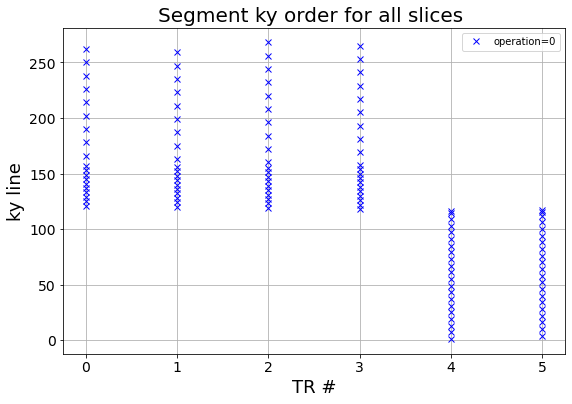

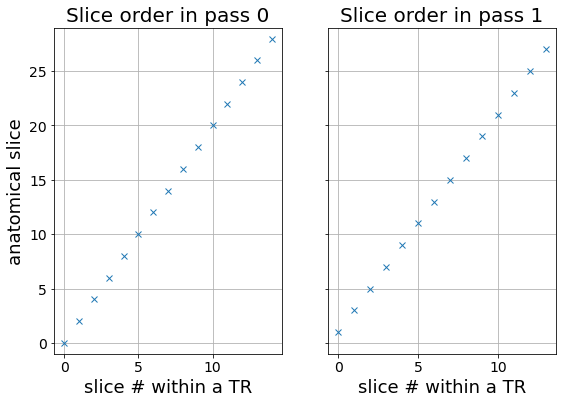

In [8]:
# these 3 FLAIR scans are identical so we do not need to distinguish the following files
# we'll just use the last one from the for loop
file_2d_acqorder = os.path.join(data_2d_path, 'loopcounters.npz')
order_ky, order_slice, order_info = mot.acqorder.get_segments(file_2d_acqorder, show_plots=True)
_, num_seg = mot.sim.prep_seg(order_ky, skip_seg=None)

# we need these for the ARC recon of accelerated data
file_archive_path = os.path.join(data_2d_path, 'archive_path.txt')
file_kacq_yz = os.path.join(data_2d_path, 'kacq_yz.txt')

In [21]:
def print_text_file(file_path):
    with open(file_path, 'r') as f:
        print('printing contents of file:\n\t{}'.format(file_path))
        print('--------------------------\n')
        contents = f.read()
        print(contents)

In [9]:
print_text_file(file_archive_path)

NameError: name 'print_text_file' is not defined

In [ ]:
print_text_file(file_kacq_yz)

# Generate motion-corrupted data

In [10]:
def generate_pose_str(pose_list):
    if len(pose_list) == 0:
        str_pose = 'None'
    else:
        str_pose = '-'.join([str(elem) for elem in pose_list])
        
    return str_pose

In [11]:
WRITE_FIG = False

In [12]:
sli = 8
pass_num = 1
cha = 0

# choose the first scan
# - we will take parts of k-space from the other two scans
series = '4'
data_2d_path = glob.glob(os.path.join(out_root,'s'+series+'*'))[0]

file_archive_path = os.path.join(data_2d_path, 'archive_path.txt')
with open(file_archive_path, 'r') as the_file:
    archive_path = the_file.read()
    
    sc = ge.read.ScanArchive(archive_path)
    sc.set_calib_fnames(print_h5_contents=False)

info, corners, orientation = ge.recon.get_slice_info(
    sli, pass_num,
    sc.archive)

psdnameannot:  
psd_iname: FSE
psdname: fse-xl
pseq: 19.0
se_desc: ANONYMIZED
 ----
 sequence is 2DFSE 
 ----
target of GERecon.so symlink is:
	/vast/kmotion/code/ge-orchestra/orchestra-sdk-1.10-1/orchestra-sdk-1.10-1.python/GERecon.so.python35
orchestra_version: 	orchestra-sdk-1.10-1.python
gerecon_version: 	GERecon.so.python35
fname_arc:  kacq_yz.txt.222921707
fname_asset:  34990/Asset-ID222921966-Repetition0000.h5
fname_noise:  34990/NoiseStatistics-Coil1806476567-Repetition0000.h5
fname_pure:  34990/Pure-ID222921966-Repetition0000.h5
fname_purecoil:  None
fname_rawcal:  34990/RawCalibration-ID222921966-Repetition0000.h5
Gradient coil is HRMw


In [13]:
# choose how to combine the scans here
# ------------------------------------
pose1_segs = []
pose1_segs = [5]
# pose1_segs = [0,1,2,3,4,5]
pose2_segs = []
# pose2_segs = [1]
# pose2_segs = [0,1,2,3,4,5]
# ------------------------------------

k_start = all_k[0].copy()
k_start = np.squeeze(k_start[:, :, sli, :, pass_num])

nx, ny, nc = k_start.shape

# initialise k with pose 1 and replace data from poses 2 & 3
# important to .copy() here! to avoid getting a pointer
k_total = k_start.copy()

str_pose1 = generate_pose_str(pose1_segs)
str_pose2 = generate_pose_str(pose2_segs)

pose_str = 'pose1-segs'+str_pose1+'__pose2-segs'+str_pose2
print(pose_str)

repeated_segs = list(set(pose1_segs).intersection(pose2_segs))
print(repeated_segs)
if len(repeated_segs) > 0:
    raise Exception('should not pick the same segment from pose 1 and 2!')

for seg in range(num_seg):

    # change to python 0-based indexing
    i_ky = order_ky[seg].astype(int) - 1

    if seg in pose1_segs:
        k_data = all_k[1].copy()
    elif seg in pose2_segs:
        k_data = all_k[2].copy()
    else:
        continue
    
    print('seg={} - overwriting k_total...'.format(seg))
    k_data = np.squeeze(k_data[:, :, sli, :, pass_num])
    k_total[:, i_ky, :] = k_data[:, i_ky, :]
    
k_start_arc = ge.recon.recon_arc_kspace(k_start, data_2d_path)
k_arc = ge.recon.recon_arc_kspace(k_total, data_2d_path)

# im_start_arc = np.abs(ge.recon.cha_combine_rms(ge.recon.ifft2(k_start_arc[:,:,:], shift=True), 2))
# im_arc = np.abs(ge.recon.cha_combine_rms(ge.recon.ifft2(k_arc[:,:,:], shift=True), 2))

im_start_arc, mag, gradwarp = ge.recon.transform_combine_orient(
    k_start_arc
    ,sc.archive
    ,info
    ,corners
    ,orientation
    ,sequence=sc.sequence
    ,fname_asset=sc.fname_asset
)

im_arc, mag, gradwarp = ge.recon.transform_combine_orient(
    k_arc
    ,sc.archive
    ,info
    ,corners
    ,orientation
    ,sequence=sc.sequence
    ,fname_asset=sc.fname_asset
)


pose1-segs5__pose2-segsNone
[]
seg=5 - overwriting k_total...
running ARC recon, input dims: (416, 270, 44)
psdnameannot:  
psd_iname: FSE
psdname: fse-xl
pseq: 19.0
se_desc: ANONYMIZED
 ----
 sequence is 2DFSE 
 ----
target of GERecon.so symlink is:
	/vast/kmotion/code/ge-orchestra/orchestra-sdk-1.10-1/orchestra-sdk-1.10-1.python/GERecon.so.python35
orchestra_version: 	orchestra-sdk-1.10-1.python
gerecon_version: 	GERecon.so.python35
  running ARC on slice: 0
running ARC recon, input dims: (416, 270, 44)
psdnameannot:  
psd_iname: FSE
psdname: fse-xl
pseq: 19.0
se_desc: ANONYMIZED
 ----
 sequence is 2DFSE 
 ----
target of GERecon.so symlink is:
	/vast/kmotion/code/ge-orchestra/orchestra-sdk-1.10-1/orchestra-sdk-1.10-1.python/GERecon.so.python35
orchestra_version: 	orchestra-sdk-1.10-1.python
gerecon_version: 	GERecon.so.python35
  running ARC on slice: 0
-- doing ASSET recon...
-- doing ASSET recon...


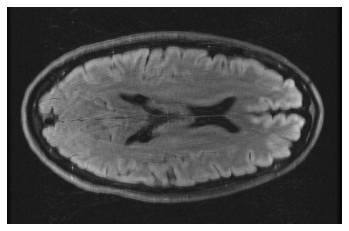

In [18]:
plotting_utils.plot_img_from_k(k_total,vmin=0,vmax=10000)

In [20]:
print(k_total.shape)

(416, 270, 44)


In [24]:
k_total = utils.split_reim_channels(tf.expand_dims(k_total,0))

In [25]:
norm = np.max(plotting_utils.rss_image_from_multicoil_k(k_total[0,:,:,:]).flatten())
k_total /= norm


In [30]:
num_coils = 44
model = models.get_multicoil_interlacer_model(
        (None, None, 2*num_coils),
        '3-piece',
        9,
        64,
        1,
        6,
        num_coils)

multicoil_ssim = losses.multicoil_ssim('FREQ',num_coils)

lr = 1e-3
model.compile(
    optimizer=tf.keras.optimizers.SGD(
        lr=lr),
    loss=multicoil_ssim,
    loss_weights=1)
epoch = str(1850).zfill(4)
model.load_weights('training/FINAL_interlacer_noshift/44-INTERLACER_RESIDUAL-9-64-1-6-multicoil_ssim-FREQ-FREQ-3-piece-5000-6/cp-'+epoch+'.ckpt')


In [31]:
v_model = model.predict(k_total)

In [35]:
v_grappa = utils.split_reim_channels(tf.convert_to_tensor(np.expand_dims(k_arc,0)))/norm

In [41]:
v_in = k_total

In [50]:
k_start_arc.shape

(416, 270, 44)

In [51]:
v_out = utils.split_reim_channels(tf.convert_to_tensor(np.expand_dims(k_start_arc,0)))/norm

In [39]:
res_info = np.load(os.path.join(data_2d_path,'resolutioninfo.npz'))
psx = res_info['pixelSizeX']
psy = res_info['pixelSizeY']

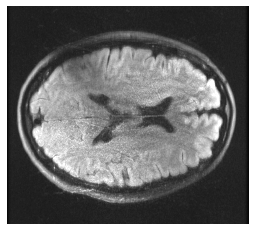

In [40]:
plotting_utils.plot_img_from_k(utils.join_reim_channels(tf.convert_to_tensor(v_model))[0,...],psx=psx,psy=psy)

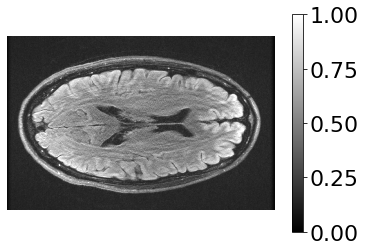

In [45]:
plotting_utils.plot_img_from_k(utils.join_reim_channels(tf.convert_to_tensor(v_grappa))[0,...]/norm)
plt.colorbar()

In [47]:
k.shape

(416, 270, 15, 44, 2)

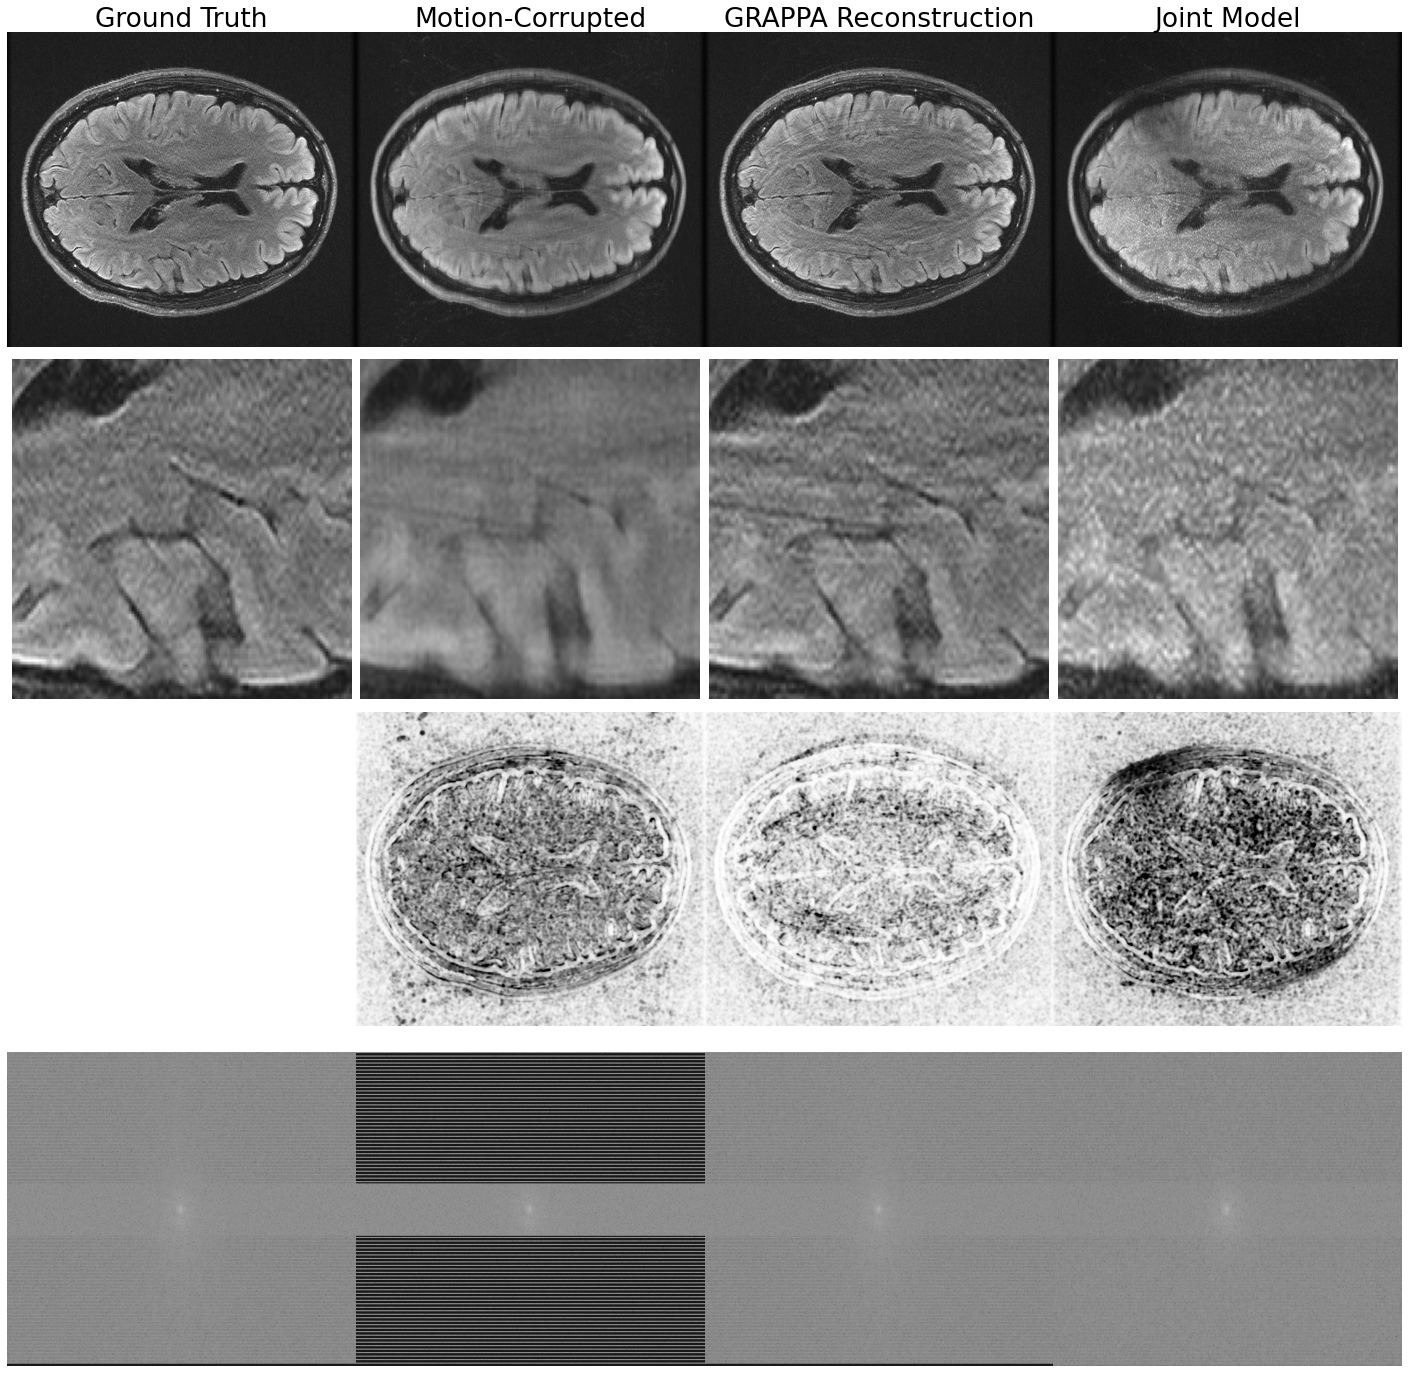

In [54]:
plotting_utils.plot_comparison_results(v_out,v_in,[v_grappa/norm,v_model],['GRAPPA Reconstruction',
                                                                     'Joint Model'],psx=psx,psy=psy,x=300,y=200,ind=0,vmin=0,vmax=1.2)

In [19]:
np.savez('series_motion_kspace.npz',k_total=k_total)

In [14]:
def simulate_multicoil_k(image, maps):
    """
    image: (x,y) (not-shifted)
    maps: (x,y,coils)
    """
    image = np.repeat(image[:, :, np.newaxis], maps.shape[2], axis=2)
    sens_image = image*maps
    shift_sens_image = np.fft.ifftshift(sens_image, axes=(0,1))

    k = np.fft.fftshift(np.fft.fft2(shift_sens_image, axes=(0,1)), axes=(0,1))
    return k

def rss_image_from_multicoil_k(k):
    """
    k: (x,y,coils) (shifted)
    """
    img_coils = np.fft.ifft2(np.fft.ifftshift(k, axes=(0,1)), axes=(0,1))
    img = np.sqrt(np.sum(np.square(np.abs(img_coils)), axis=2))
    img = np.fft.fftshift(img)
    
    return img

def plot_img_from_k(k,axes=None):
    if(axes is not None):
        axes.imshow(rss_image_from_multicoil_k(k),cmap='gray',vmin=1000,vmax=10000)
        axes.axis('off')
    else:
        plt.figure()
        plt.imshow(rss_image_from_multicoil_k(k),cmap='gray')
        plt.axis('off')
    
def plot_k(k, axes=None):
    k = k[:,:,10]
    if(axes is not None):
        axes.imshow(np.log(np.abs(k)+1e-7),cmap='gray')
        axes.axis('off')
    else:
        plt.figure()
        plt.imshow(np.log(np.abs(k)+1e-7),cmap='gray')
        plt.axis('off')
    

In [ ]:
fig, axes = plt.subplots(2,2,figsize=(10,15))


plot_img_from_k(k_total,axes[0][0])
plot_img_from_k(k_arc,axes[0][1])
axes[0][0].set_title('Without GRAPPA')


plot_k(k_total,axes[1][0])
plot_k(k_arc, axes[1][1])
axes[0][1].set_title('With GRAPPA')

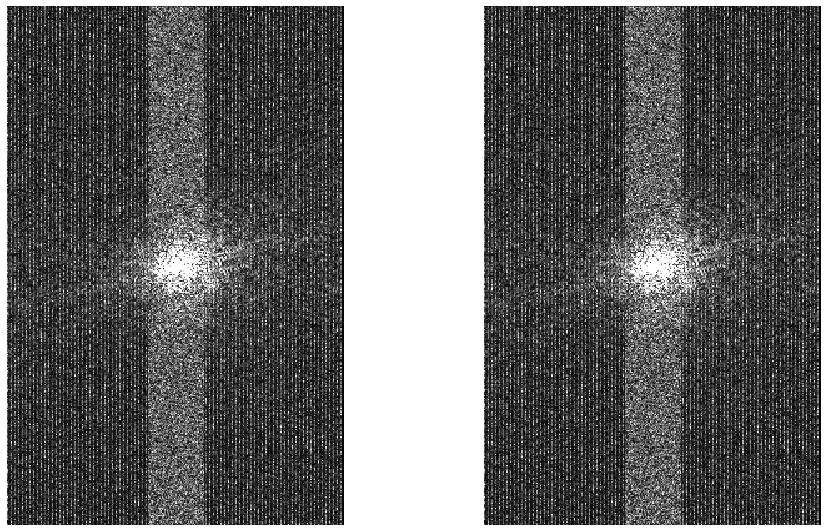

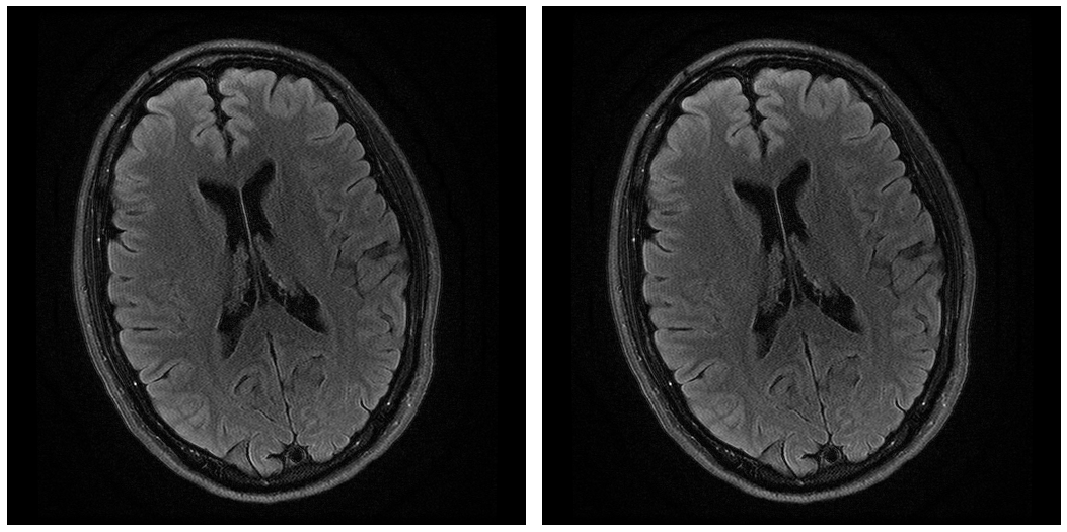

In [33]:
imshow_args = [{'vmin':0, 'vmax':200000}]
fig, ax = ne.plot.slices([np.abs(k_start_arc[:,:,0]), np.abs(k_arc[:,:,0])], imshow_args=imshow_args, cmaps=['gray'], grid=True, do_colorbars=False)

fig, ax = ne.plot.slices([im_start_arc, im_arc], cmaps=['gray'], grid=True, do_colorbars=False)

if WRITE_FIG:
    fig.savefig(fname + '_im_start_'+pose_str+'.png', dpi=300, bbox_inches='tight', pad_inches=0)

In [ ]:
fig, ax = ne.plot.slices([im_arc], cmaps=['gray'], grid=True, do_colorbars=False)

if WRITE_FIG:
    fig.savefig(fname + '_im_start_'+pose_str+'.png', dpi=300, bbox_inches='tight', pad_inches=0)

# Cross-correlation of k-space phase-encode ($k_y$) lines
$C e^{(i\phi)}$

In [ ]:
WRITE_FIG = False

In [ ]:
k_test=k_total.copy()

# set ky indices to show
# ----------------------
midnx = round(k_test.shape[0]/2.)
ky_inds = np.where(np.abs(k_test[midnx, :, 0]))
ky_inds = ky_inds[0]

# ky_inds = np.array([  0,   3,   6,   9,  12,  15,  18,  21,  24,  27,  30,  33,  36,
#         39,  42,  45,  48,  51,  54,  57,  60,  63,  66,  69,  72,  75,
#         78,  81,  84,  87,  90,  93,  96,  99, 102, 105, 108, 111, 
#        159, 162, 165, 168, 171, 174, 177, 180,
#        183, 186, 189, 192, 195, 198, 201, 204, 207, 210, 213, 216, 219,
#        222, 225, 228, 231, 234, 237, 240, 243, 246, 249, 252, 255, 258,
#        261, 264, 267])

# ky_inds = np.array([113,
#         114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126,
#         127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
#         140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
#         153, 154, 155, 156, 157])


# compute cross-correlation
# -------------------------
cc_still = mot.analysis.k_cross_corr(k_start[:, ky_inds, :])
cc_move = mot.analysis.k_cross_corr(k_test[:, ky_inds, :])


# find the channels with largest signal
# -------------------------------------
cha_sig = np.sum(np.abs(k_total), (0,1))
idx_cha = np.argsort(cha_sig)[::-1] # descending order

# set channels to show
# --------------------
cha = 5
cha = np.array(range(44)).astype(int)
cha = idx_cha[:5]

# choose plot (0) or imshow (1)
# -----------------------------
fig_type = 0

# unwrap phase - seems to not work properly?
unwrap_pha = True
unwrap_pha = False

# magnitude
# ---------
mag_still = np.abs(cc_still[:,cha])
mag_motion = np.abs(cc_move[:,cha])
    
if fig_type==0:
                    
    vals = [mag_still, mag_motion]
    titles = ['still', 'motion']
    
    ylabel = 'Magnitude [a.u.]'
    xlabel = '$k_y$ index'
    
    fig, axs = mot.show.plot_horizontal(
        vals
        ,titles=titles, xlabel=xlabel, ylabel=ylabel
    )
    
elif fig_type==1:
    fig, axs = plt.subplots(1, 2)
    fig.set_size_inches(12, 5, forward=True)
    
    axs[0].imshow(mag_still.transpose());
    axs[1].imshow(mag_motion.transpose());

if WRITE_FIG:
    fig.savefig(fname + '_crosscor-mag_'+pose_str+'.png', dpi=300, bbox_inches='tight', pad_inches=0)
    
# phase
# -----
pha_still = np.angle(cc_still[:,cha])
pha_motion = np.angle(cc_move[:,cha])
if unwrap_pha:
    pha_still = np.unwrap(pha_still)
    pha_motion = np.unwrap(pha_motion)

if fig_type==0:
    
    vals = [pha_still, pha_motion]
    titles = ['still', 'motion']
    
    ylabel = 'Phase [rad]'
    xlabel = '$k_y$ index'
    
    fig, axs = mot.show.plot_horizontal(
        vals
        ,titles=titles, xlabel=xlabel, ylabel=ylabel
    )

elif fig_type==1:
    fig, axs = plt.subplots(1, 2)
    fig.set_size_inches(12, 5, forward=True)
    
    axs[0].imshow(pha_still.transpose());
    axs[1].imshow(pha_motion.transpose());

if WRITE_FIG:
    fig.savefig(fname + '_crosscor-pha_'+pose_str+'.png', dpi=300, bbox_inches='tight', pad_inches=0)

# Compare Real versus Simulated data

In [ ]:
# im=5; mri_robust_register --mov ${D}/s${im}-2DFSE/image_fromdicom.nii.gz --dst ${D}/s3-2DFSE/image_fromdicom.nii.gz --lta s${im}tos3.lta --mapmov s${im}tos3.nii.gz --weights s${im}tos3-weights.nii.gz --iscale --satit

# (base) oribi[1]:register$ im=4; lta_convert --inlta s${im}tos3.lta --outlta s${im}tos3-inverse.lta --invert
# dev
# 
# --inlta: s4tos3.lta input LTA transform.
# --outlta: s4tos3-inverse.lta output LTA.
# --invert: will invert transform.
#  LTA read, type : 1
#  0.98518  -0.16926  -0.02793  -4.63902;
#  0.16979   0.98532   0.01802   0.20584;
#  0.02447  -0.02250   0.99945   0.36269;
#  0.00000   0.00000   0.00000   1.00000;
# Writing  LTA to file s4tos3-inverse.lta...
# lta_convert successful.

# (base) oribi[1]:register$ im=5; lta_convert --inlta s${im}tos3.lta --outlta s${im}tos3-inverse.lta --invert
# dev
# 
# --inlta: s5tos3.lta input LTA transform.
# --outlta: s5tos3-inverse.lta output LTA.
# --invert: will invert transform.
#  LTA read, type : 1
#  0.99992  -0.00008   0.01228  -1.30636;
# -0.00235   0.98020   0.19798   2.21947;
# -0.01205  -0.19799   0.98013   3.67531;
#  0.00000   0.00000   0.00000   1.00000;
# Writing  LTA to file s5tos3-inverse.lta...
# lta_convert successful.



# - final transform: 
# Tf = [ ...
# 0.9851544831872 -0.1702775100989  0.0218223236752 56.4171029788345 
# 0.1706670196439  0.9851746407472 -0.0174268653089 -36.2436538028311 
# -0.0185313966533  0.0208925054303  0.9996099692155 -0.0022395796526 
# 0                0                0  1.0000000000000  ]

# - final iscale:  If = 1.00021

# **********************************************************
# *
# * WARNING: Registration did not converge in 5 steps! 
# *          Problem might be ill posed. 
# *          Please inspect output manually!
# *
# **********************************************************

# Final Transform:
# Adjusting final transform due to initial resampling (voxel or size changes) ...
# M = [ ...
# 0.9851544832308 -0.1702776015041  0.3047104360143 56.3327119980256 
# 0.1706669280220  0.9851746408295 -0.2433354399025 -36.2516272063459 
# -0.0013271555149  0.0014962509286  0.9996099690896  0.0005866418145 
# 0                0                0  1.0000000000000  ]




# - final transform: 
# Tf = [ ...
# 0.9999325748799 -0.0007974218107 -0.0115848958807  5.5085801145579 
# -0.0015125425180  0.9801963007802 -0.1980225344548 39.1067806747652 
# 0.0115133795752  0.1980267054092  0.9801290047925 -44.3024710781052 
# 0                0                0  1.0000000000000  ]

# - final iscale:  If = 1.01476

# **********************************************************
# *
# * WARNING: Registration did not converge in 5 steps! 
# *          Problem might be ill posed. 
# *          Please inspect output manually!
# *
# **********************************************************

# Final Transform:
# Adjusting final transform due to initial resampling (voxel or size changes) ...
# M = [ ...
# 0.9999325748848 -0.0007974221146 -0.1617627272442  5.5077998713868 
# -0.0015125416637  0.9801963021622 -2.7650354557084 39.0903304392168 
# 0.0008245490577  0.0141820062427  0.9801290034056 -3.1657502591611 
# 0                0                0  1.0000000000000  ]



## create transforms that match real data
- here values were hacked to reproduce the transforms from `mri_robust_register` on the acquired 2D FSE FLAIR data

In [ ]:
import voxelmorph as vxm

In [ ]:
# affine = vxm.tf.synthseg.utils.create_affine_transformation_matrix(
#     n_dims=len(img_moved.shape)
#     ,translation=np.array([4., 0., 0.])
#     ,rotation=np.array([0., 0., -9.5])
# )
# print(affine)

# affine = vxm.tf.synthseg.utils.create_affine_transformation_matrix(
#     n_dims=len(img_moved.shape)
#     ,translation=np.array([-1.3, 2.2, 3.7])
#     ,rotation=np.array([-11., 0., 0.])
# )
# print(affine)

In [ ]:
# from the registration of FLAIR images

# cat s4tos3.lta
affine_look_right = np.array([
    [9.851764440536499e-01, -1.692562997341156e-01, -2.792640775442123e-02, -4.639022827148438e+00]
    ,[1.697910875082016e-01, 9.853155016899109e-01, 1.802300661802292e-02, 2.058410644531250e-01]
    ,[2.446597069501877e-02, -2.249738574028015e-02, 9.994475245475769e-01, 3.626937866210938e-01]
    ,[0.000000000000000e+00, 0.000000000000000e+00, 0.000000000000000e+00, 1.000000000000000e+00]
])

# cat s5tos3.lta
affine_look_up = np.array([
    [9.999247193336487e-01, -8.128932677209377e-05, 1.227889209985733e-02, -1.306358337402344e+00]
    ,[-2.351325936615467e-03, 9.802036881446838e-01, 1.979777961969376e-01, 2.219467163085938e+00] 
    ,[-1.205192320048809e-02, -1.979917883872986e-01, 9.801298379898071e-01, 3.675308227539062e+00]
    ,[0.000000000000000e+00, 0.000000000000000e+00, 0.000000000000000e+00, 1.000000000000000e+00]
])

## load 3D isotropic FLAIR and orient to RAS

In [ ]:
file_img_flair = '/Users/srf29/github-packages/ge-data/data_chelsea/che0415/recon/s8-3DCUBEFLAIR/image_fromdicom.nii.gz'

img_fromdicom, _, img_fromdicom_nib = mot.utils.load_nii(file_img_flair)

ornt = nib.io_orientation(img_fromdicom_nib.affine)

# can orient image data to RAS but want the affine too
# - use nib.as_closest_canonical on img_fromdicom_nib
img_ras = nib.apply_orientation(img_fromdicom, ornt)

In [ ]:
nib_ras = nib.as_closest_canonical(img_fromdicom_nib)
nib.save(nib_ras, fname+'_img_ras.nii.gz')

# image data from original position
img_ras = nib_ras.get_fdata()
# use affine_ras save transformed image to nii.gz
affine_ras = nib_ras.affine

## Transform isotropic image to look "right"

In [ ]:
# img_moved, affine_transform = mot.transform.vxm_affine(
#     img_ras
#     ,translation=np.array([-4., 0., 0.])
#     ,rotation=np.array([0., 0., 9.5])
# )
# print(affine_transform)

moving = img_ras.astype('float32')
displacement = vxm.utils.affine_to_shift(affine_look_right, moving.shape)
moved_tf = vxm.utils.transform(moving, displacement, fill_value=0)
img_moved = moved_tf.numpy().squeeze()

nib_moved = nib.Nifti1Image(img_moved, affine_ras)
nib.save(nib_moved, fname+'_img_ras_look-right.nii.gz')

## Transform isotropic image to look "up"

In [ ]:
# img_moved, affine_transform = mot.transform.vxm_affine(
#     img_ras
#     ,translation=np.array([-1.3, 2.2, 3.7])
#     ,rotation=np.array([-11., 0., 0.])
# )
# print(affine_transform)

moving = img_ras.astype('float32')
displacement = vxm.utils.affine_to_shift(affine_look_up, moving.shape)
moved_tf = vxm.utils.transform(moving, displacement, fill_value=0)
img_moved = moved_tf.numpy().squeeze()

nib_moved = nib.Nifti1Image(img_moved, affine_ras)
nib.save(nib_moved, fname+'_img_ras_look-up.nii.gz')

In [ ]:
ne.plot.volume3D(img_ras, cmaps=['gray'], do_colorbars=True)
ne.plot.volume3D(img_moved, cmaps=['gray'], do_colorbars=True)

# Run simulation

In [ ]:
data_source = 'data_volunteer'
subjid = 'hv0001'
dir_subj_2d = os.path.join(dir_alldata, data_source, subjid)

data_2d_path = os.path.join(dir_subj_2d, 'recon/s3-2DFSE')

file_2d_acqorder = os.path.join(data_2d_path, 'loopcounters.npz')
order_ky, order_slice, order_info = mot.acqorder.get_segments(file_2d_acqorder, show_plots=True)

_, num_seg = mot.sim.prep_seg(order_ky, skip_seg=None)

In [ ]:
data_source = 'data_chelsea'
subjid = 'che0415'
dir_subj_iso = os.path.join(dir_alldata, data_source, subjid)

data_iso_path = os.path.join(dir_subj_iso, 'recon/s8-3DCUBEFLAIR')

# file_iso_img = os.path.join(data_iso_path, 'image_fromdicom.nii.gz')

# iso_img, _, volnii = mot.utils.load_nii(file_iso_img)
# ne.plot.volume3D(iso_img, cmaps=['gray'], do_colorbars=True)

In [ ]:
mot_right = np.array([-4., 0., 0., 0., 0., 9.5])
mot_up = np.array([-1.3, 2.2, 3.7, -11., 0., 0.])

motion_array_or_file = np.zeros((num_seg, 6))

# use the pose?_segs set earlier
if len(pose1_segs) > 0:
    motion_array_or_file[np.array(pose1_segs),:] = mot_right
if len(pose2_segs) > 0:
    motion_array_or_file[np.array(pose2_segs),:] = mot_up

# HACK for switch_phaseenc to get look right and then up
# motion_array_or_file = motion_array_or_file[:, [1,0,2, 4,3,5]]
# CORRECT way for right-left phase-encoding would be: apply transforms to the transformation matrices
print(motion_array_or_file)

# set output directory

In [ ]:
series_dir = os.path.basename(os.path.abspath(data_2d_path))
print(series_dir)

output_dir = os.path.join(
    dir_subj_2d
    , 'sim2d'
    , series_dir 
)
print(output_dir)

if not os.path.exists(output_dir):
    print('making output_dir: {}'.format(output_dir))
    os.makedirs(output_dir)
else:
    print('output_dir exists: {}'.format(output_dir))

In [ ]:
# normal number of poses
# ++++++++++++++++++++++++++++++++++++
choose_slice = 154

fixed_pose_all_slices = True

# set this to exclude slices in the isotropic image that don't have much signal
set_slice_signal_threshold = 0.15
# or set it to None to spread 2D slices over the whole extent of the isotropic slices
# which will mean some slices without signal will be simulated:
# set_slice_signal_threshold = None

# FLAIR typically has right-left (RL) phase-encoding
# set this to change the orientation of the isotropic FLAIR data
# from R,A,S -> A,R,S in terms of readout, phase-encode, slice dimensions
switch_phaseenc = True
switch_phaseenc = False

right_left_phaseenc = True

# only simulate the first pass (concatentation) of slices
choose_pass = 0
choose_pass = None

match_kspace_matrix = True

In [ ]:
k_2d_segs, all_img_moved, all_img_moved_slice, all_img_cha_slice, iso_sens_maps \
                     = mot.sim.run_2d_matched_iso(
                        data_iso_path
                        , file_2d_acqorder
                        , motion_array_or_file=motion_array_or_file
                        , output_dir=output_dir
                        , choose_slice=choose_slice  # can set this to only test one slice
                        , espirit_auto_calib=False
                        , switch_phaseenc=switch_phaseenc
                        , right_left_phaseenc=right_left_phaseenc
                        , fixed_pose_all_slices=fixed_pose_all_slices
                        , set_slice_signal_threshold=set_slice_signal_threshold
                        , match_kspace_matrix=match_kspace_matrix
                        , choose_pass=choose_pass
                        )

# re-orient dimensions for ARC reconstruction
orig_k_2d_segs = np.copy(k_2d_segs)

if right_left_phaseenc:
    k_2d_segs = orig_k_2d_segs.transpose((1,0,2,3))
print(k_2d_segs.shape)

In [ ]:
k_start = np.copy(k_2d_segs)

In [ ]:
# open the ScanArchive
file_archive_path = os.path.join(data_2d_path, 'archive_path.txt')
with open(file_archive_path, 'r') as the_file:
    archive_path = the_file.read()
    
    sc = ge.read.ScanArchive(archive_path)
    sc.set_calib_fnames(print_h5_contents=False)

info, corners, orientation = ge.recon.get_slice_info(
    sli, pass_num,
    sc.archive)

In [ ]:
cha = 0

k_arc = ge.recon.recon_arc_kspace(k_2d_segs, data_2d_path)

im_k_2d_segs = np.abs(ge.recon.cha_combine_rms(ge.recon.ifft2(k_2d_segs[:,:,:,0], False), 2))
im_arc = np.abs(ge.recon.cha_combine_rms(ge.recon.ifft2(k_arc[:,:,:,0], False), 2))

dim_256 = (256, 256)
im_k_2d_segs = mot.utils.resize_zero_padding_nd(im_k_2d_segs, dim_256)
im_arc = mot.utils.resize_zero_padding_nd(im_arc, dim_256)

im_k_2d_segs = im_k_2d_segs[::-1,:]
im_arc = im_arc[::-1,:]
# im_arc, mag, gradwarp = ge.recon.transform_combine_orient(
#     k_arc.squeeze()
#     ,sc.archive
#     ,info
#     ,corners
#     ,orientation
#     ,sequence=sc.sequence
#     ,fname_asset=None
# )

# im_arc = np.fft.fftshift(im_arc, axes=[0,1])

ne.plot.slices([np.log(np.abs(k_2d_segs[:,:,cha,0])), np.log(np.abs(k_arc[:,:,cha,0]))], cmaps=['gray'], grid=True, do_colorbars=False)
# ne.plot.slices([im_k_2d_segs[::-1,:], im_arc[::-1,:]], cmaps=['gray'], grid=True, do_colorbars=False)
ne.plot.slices([im_k_2d_segs, im_arc], cmaps=['gray'], grid=True, do_colorbars=False)

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.imshow(im_arc, vmin=0, vmax=10000, cmap='gray')
plt.axis('off')

In [ ]:
sli_range = (153,156)

# save_dir = sim_subjid + '_' + series_dir + '_' + date_today

ani, ims, fig = mot.show.animate_artists_iso_images(
    all_img_moved, sli_range, f_start=None, coil_sens=iso_sens_maps)

mot.show.write_animation(ani, f_start='hv0001_right_left_phaseenc', fps=1.5)

In [ ]:
# set k_start to be the simulated k-space WITHOUT motion
k_test=np.copy(k_2d_segs[:,:,:,0])

In [ ]:
# set k_test to be the simulated k-space WITH motion
k_test=np.copy(k_2d_segs[:,:,:,0])

In [ ]:
# set ky indices to show
# ----------------------
midnx = round(k_test.shape[0]/2.)
ky_inds = np.where(np.abs(k_test[midnx, :, 0]))
ky_inds = ky_inds[0]

# ky_inds = np.array([  0,   3,   6,   9,  12,  15,  18,  21,  24,  27,  30,  33,  36,
#         39,  42,  45,  48,  51,  54,  57,  60,  63,  66,  69,  72,  75,
#         78,  81,  84,  87,  90,  93,  96,  99, 102, 105, 108, 111, 
#        159, 162, 165, 168, 171, 174, 177, 180,
#        183, 186, 189, 192, 195, 198, 201, 204, 207, 210, 213, 216, 219,
#        222, 225, 228, 231, 234, 237, 240, 243, 246, 249, 252, 255, 258,
#        261, 264, 267])

# ky_inds = np.array([113,
#         114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126,
#         127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
#         140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
#         153, 154, 155, 156, 157])


# compute cross-correlation
# -------------------------
cc_still = mot.analysis.k_cross_corr(k_start[:, ky_inds, :])
cc_move = mot.analysis.k_cross_corr(k_test[:, ky_inds, :])


# find the channels with largest signal
# -------------------------------------
cha_sig = np.sum(np.abs(k_test), (0,1))
idx_cha = np.argsort(cha_sig)[::-1] # descending order

# set channels to show
# --------------------
cha = 5
cha = np.array(range(44)).astype(int)
cha = idx_cha[:5]

# choose plot (0) or imshow (1)
# -----------------------------
fig_type = 0

# unwrap phase - seems to not work properly?
unwrap_pha = True
unwrap_pha = False

# magnitude
# ---------
mag_still = np.abs(cc_still[:,cha])
mag_motion = np.abs(cc_move[:,cha])
    
if fig_type==0:
                    
    vals = [mag_still, mag_motion]
    titles = ['still', 'motion']
    
    ylabel = 'Magnitude [a.u.]'
    xlabel = '$k_y$ index'
    
    fig, axs = mot.show.plot_horizontal(
        vals
        ,titles=titles, xlabel=xlabel, ylabel=ylabel
    )
    
elif fig_type==1:
    fig, axs = plt.subplots(1, 2)
    fig.set_size_inches(12, 5, forward=True)
    
    axs[0].imshow(mag_still.transpose());
    axs[1].imshow(mag_motion.transpose());

if WRITE_FIG:
    fig.savefig(fname + '_crosscor-mag_'+pose_str+'.png', dpi=300, bbox_inches='tight', pad_inches=0)
    
# phase
# -----
pha_still = np.angle(cc_still[:,cha])
pha_motion = np.angle(cc_move[:,cha])
if unwrap_pha:
    pha_still = np.unwrap(pha_still)
    pha_motion = np.unwrap(pha_motion)

if fig_type==0:
    
    vals = [pha_still, pha_motion]
    titles = ['still', 'motion']
    
    ylabel = 'Phase [rad]'
    xlabel = '$k_y$ index'
    
    fig, axs = mot.show.plot_horizontal(
        vals
        ,titles=titles, xlabel=xlabel, ylabel=ylabel
    )

elif fig_type==1:
    fig, axs = plt.subplots(1, 2)
    fig.set_size_inches(12, 5, forward=True)
    
    axs[0].imshow(pha_still.transpose());
    axs[1].imshow(pha_motion.transpose());

if WRITE_FIG:
    fig.savefig(fname + '_crosscor-pha_'+pose_str+'.png', dpi=300, bbox_inches='tight', pad_inches=0)